In [36]:
import cantera as ct
import numpy as np
import csv

# %config InlineBackend.figure_formats = ["svg"]
%matplotlib inline
import matplotlib.pylab as plt

print('running cantera version: ' + ct.__version__)

running cantera version: 3.0.0


In [37]:
g1 = ct.Solution("data/chem_aph.yaml")

C:\Users\tahze\AppData\Local\Temp\ipykernel_13280\3623203853.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in cp/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.3602934365979036
	Value computed using high-temperature polynomial: 2.9345266806587236

  g1 = ct.Solution("data/chem_aph.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_13280\3623203853.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in h/RT detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  -454.33184031861595
	Value computed using high-temperature polynomial: -401.57655092980355

  g1 = ct.Solution("data/chem_aph.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_13280\3623203853.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in s/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.335670747304918
	Value computed using high-temperature polynomial: 1.024867759488491

  g1

In [38]:
gas = ct.Solution("data/chem_aph.yaml")

C:\Users\tahze\AppData\Local\Temp\ipykernel_13280\1179660864.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in cp/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.3602934365979036
	Value computed using high-temperature polynomial: 2.9345266806587236

  gas = ct.Solution("data/chem_aph.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_13280\1179660864.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in h/RT detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  -454.33184031861595
	Value computed using high-temperature polynomial: -401.57655092980355

  gas = ct.Solution("data/chem_aph.yaml")
C:\Users\tahze\AppData\Local\Temp\ipykernel_13280\1179660864.py:1: UserWarning: NasaPoly2::validate: 
For species H2, discontinuity in s/R detected at Tmid = 2.01
	Value computed using low-temperature polynomial:  2.335670747304918
	Value computed using high-temperature polynomial: 1.024867759488491

  

In [39]:
x = 85

Y_nh3 = x*17/117.46
Y_hclo4 = x*100.46/117.46
Y_c2h4 = 15


gas.TPY = 3500, ct.one_atm, f'NH3:{Y_nh3}, HCLO4:{Y_hclo4}, C2H4:{Y_c2h4}'
gas()


  gas:

       temperature   3500 K
          pressure   1.0132e+05 Pa
           density   0.17579 kg/m^3
  mean mol. weight   50.487 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        4.7939e+06        2.4203e+08  J
   internal energy        4.2175e+06        2.1293e+08  J
           entropy            7793.4        3.9347e+05  J/K
    Gibbs function       -2.2483e+07       -1.1351e+09  J
 heat capacity c_p            1710.1             86338  J/K
 heat capacity c_v            1545.4             78023  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               NH3           0.12302           0.36468           -35.413
             HCLO4           0.72698           0.36537           -41.098
              C2H4              0.15           0.26995           -41.028


In [40]:
r = ct.IdealGasConstPressureReactor(gas)

# Create a reactor network
sim = ct.ReactorNet([r])

In [41]:
# Set the time step
time_step = 1e-6  # seconds

# Initialize arrays to store the time and temperature
time = []
temp = []

# Initialize a dictionary to store the mole fractions for each species
X = {name: [] for name in gas.species_names}

In [42]:
# Run the simulation for a certain number of steps
for n in range(1000):
    time.append(sim.time)
    temp.append(gas.T)
    for name in gas.species_names:
        X[name].append(gas[name].X)
    sim.advance(sim.time + time_step)

# Convert lists to numpy arrays for easier manipulation
time = np.array(time)
temp = np.array(temp)
for name in gas.species_names:
    X[name] = np.array(X[name])

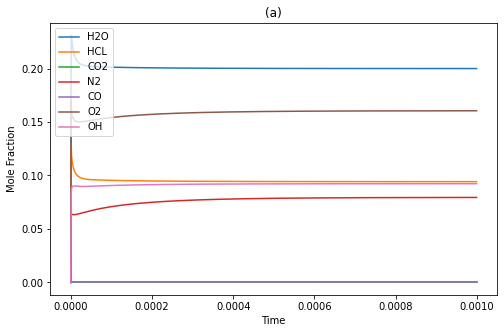

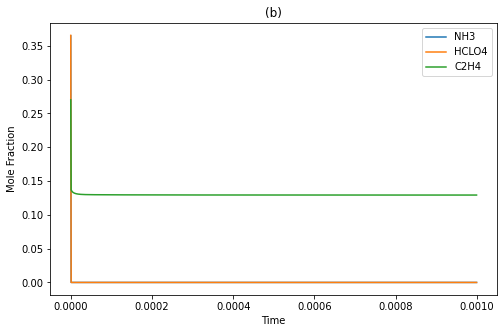

In [43]:
plt.figure(figsize=(8, 5))

for name in ['H2O', 'HCL', 'CO2', 'N2', 'CO', 'O2', 'OH']:
    plt.plot(time, X[name], label=name)
    plt.title('(a)')
    plt.xlabel('Time')
    plt.ylabel('Mole Fraction')
    plt.legend()

plt.show()
plt.figure(figsize=(8, 5))

for name in ['NH3', 'HCLO4', 'C2H4']:
    plt.plot(time, X[name], label=name)
    plt.title('(b)')
    plt.xlabel('Time')
    plt.ylabel('Mole Fraction')
    plt.legend()

plt.show()
# Limit the x-axis (temperature) from 700 to 1200 K

In [44]:
gas()


  gas:

       temperature   3133.1 K
          pressure   1.0132e+05 Pa
           density   0.094013 kg/m^3
  mean mol. weight   24.17 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        4.7939e+06        1.1587e+08  J
   internal energy        3.7161e+06        8.9819e+07  J
           entropy             12367        2.9892e+05  J/K
    Gibbs function       -3.3954e+07       -8.2068e+08  J
 heat capacity c_p            2074.2             50132  J/K
 heat capacity c_v            1730.2             41818  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2         0.0028655          0.034355           -24.374
                O2            0.2125           0.16051           -32.286
                 O          0.046489          0.070232           -16.14

In [45]:
g1.TPY = 300, ct.one_atm, f'NH3:{Y_nh3}, HCLO4:{Y_hclo4}, C2H4:{Y_c2h4}'
g1()


  gas:

       temperature   300 K
          pressure   1.0133e+05 Pa
           density   2.0509 kg/m^3
  mean mol. weight   50.487 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy             70925        3.5808e+06  J
   internal energy             21520        1.0865e+06  J
           entropy            4606.9        2.3259e+05  J/K
    Gibbs function       -1.3111e+06       -6.6196e+07  J
 heat capacity c_p            789.11             39840  J/K
 heat capacity c_v            624.42             31525  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
               NH3           0.12302           0.36468            -42.64
             HCLO4           0.72698           0.36537           -25.168
              C2H4              0.15           0.26995           -6.6404
  

In [46]:
g1.equilibrate('UV')
g1()


  gas:

       temperature   3585.4 K
          pressure   2.8667e+06 Pa
           density   2.0509 kg/m^3
  mean mol. weight   21.327 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        1.4193e+06         3.027e+07  J
   internal energy             21520        4.5894e+05  J
           entropy             11969        2.5527e+05  J/K
    Gibbs function       -4.1496e+07       -8.8497e+08  J
 heat capacity c_p            2017.1             43018  J/K
 heat capacity c_v            1627.3             34704  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                H2          0.014134           0.14952           -20.053
                O2         0.0097678         0.0065102           -32.691
                 O         0.0069246         0.0092304           -16.346